In [1]:
#Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
# from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc,RocCurveDisplay
from sklearn.model_selection import cross_val_score

In [5]:
data = pd.read_csv('C:\\Users\\altam\\train_ctrUa4K.csv')

In [6]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
data.shape

(614, 13)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
data.describe(include = 'object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [10]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
#Checking if there any duplicated value
data.duplicated().sum()

0

In [12]:
#Creating a copy of original dataframe
df = data.copy()

In [13]:
#all numerical columns
numerical_col = [fea for fea in df.columns if df[fea].dtype != 'O']
numerical_col

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [14]:
#all Categorical columns
categorical_col = [fea for fea in df.columns if df[fea].dtype == 'O']
categorical_col

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

# Filling Missing Values

In [15]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

# Outlier Detection

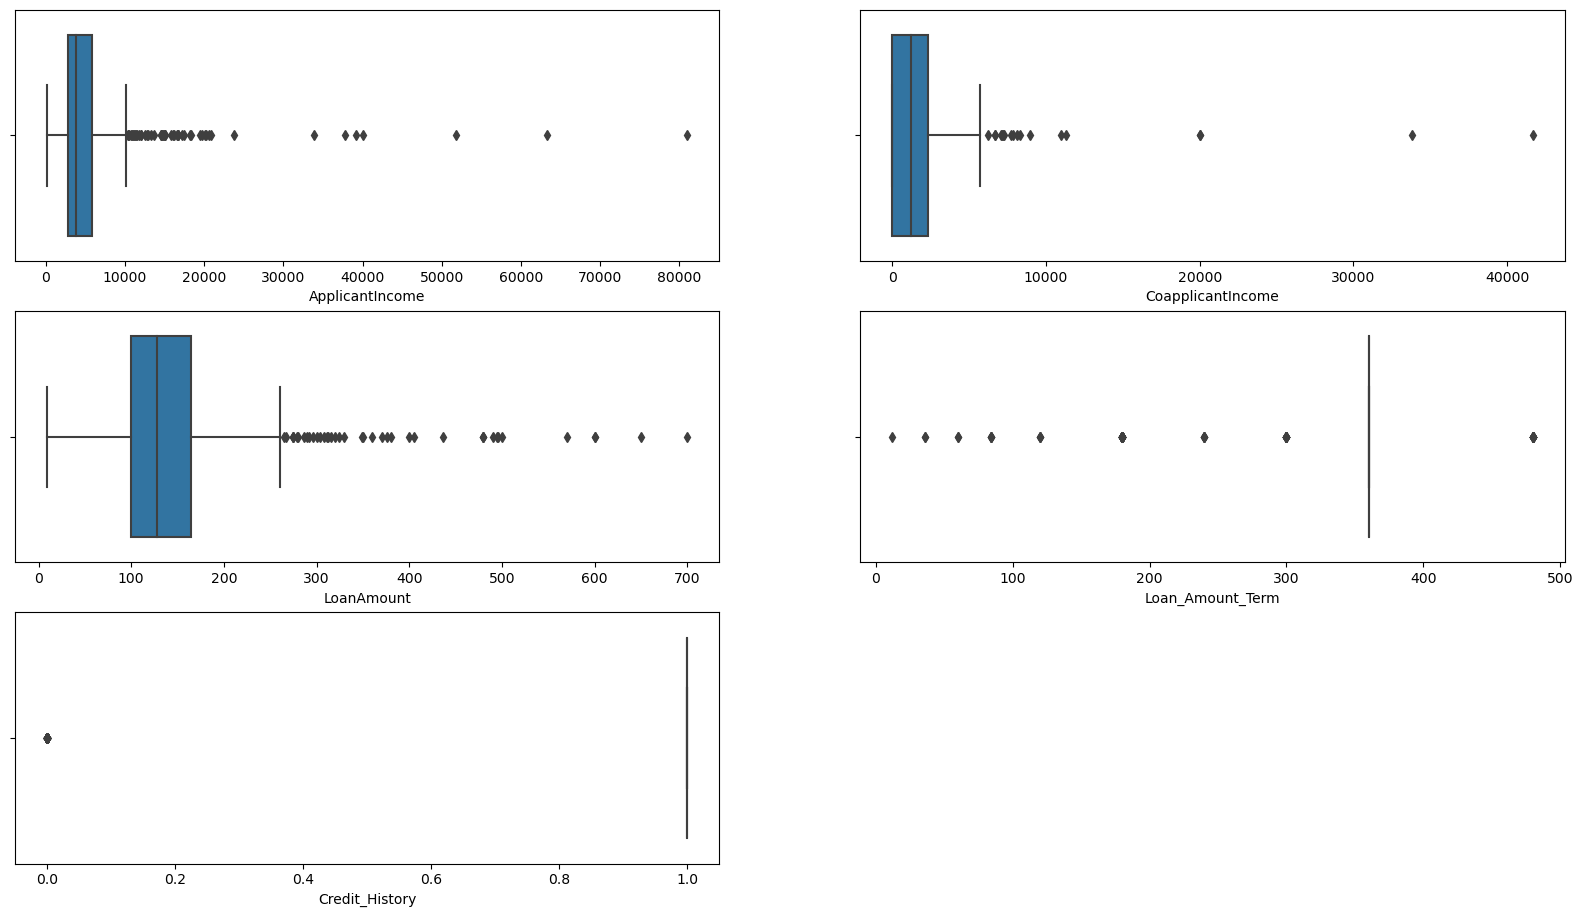

In [16]:
fig = plt.figure(figsize=[20,15])
for i ,col in enumerate(numerical_col):  
    ax1 = fig.add_subplot(4,2, i+1);
    ax1 = sns.boxplot(data = df, x=col)

In [17]:
lower_percentile = 5
upper_percentile = 95

# Calculate lower and upper bounds based on percentiles
lower_bound = df[numerical_col].quantile(lower_percentile / 100)
upper_bound = df[numerical_col].quantile(upper_percentile / 100)

# Replace values below lower percentile with lower bound and values above upper percentile with upper bound
df[numerical_col] = np.where(df[numerical_col] < lower_bound, lower_bound, df[numerical_col])
df[numerical_col] = np.where(df[numerical_col] > upper_bound, upper_bound, df[numerical_col])

In [18]:
lower_percentile = 5
upper_percentile = 95

# Calculate lower and upper bounds based on percentiles
lower_bound = df[numerical_col].quantile(lower_percentile / 100)
upper_bound = df[numerical_col].quantile(upper_percentile / 100)

# Replace values below lower percentile with lower bound and values above upper percentile with upper bound
df[numerical_col] = np.where(df[numerical_col] < lower_bound, lower_bound, df[numerical_col])
df[numerical_col] = np.where(df[numerical_col] > upper_bound, upper_bound, df[numerical_col])

# Exploring data

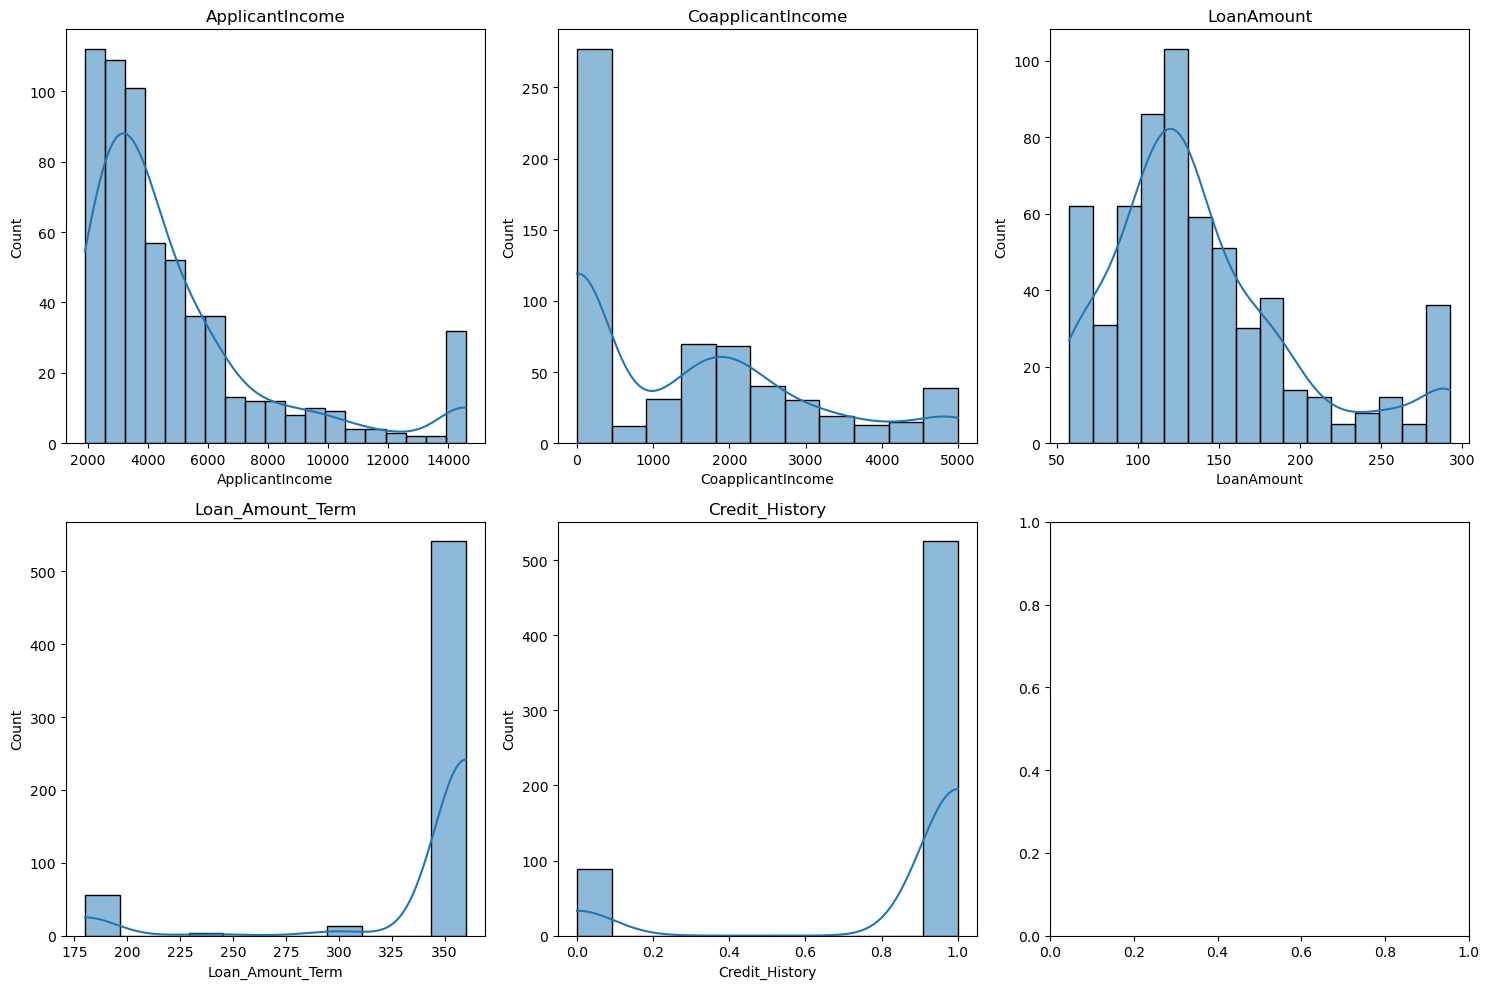

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Iterate over numeric columns and plot the distribution on each subplot
for i, col in enumerate(numerical_col):
    sns.histplot(df[col], kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(col)

plt.tight_layout()
plt.show()

In [20]:
df['ApplicantIncome'] = np.log(df['ApplicantIncome'])
df['CoapplicantIncome'] = np.log1p(df['CoapplicantIncome'])

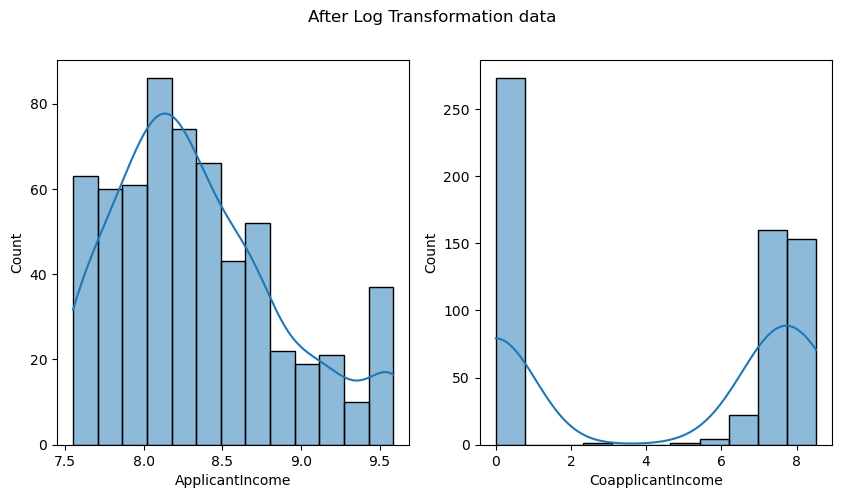

In [21]:
#After log transformation

fig = plt.figure(figsize=[10,5])

plt.subplot(1, 2, 1)
sns.histplot(df['ApplicantIncome'], kde=True)

plt.subplot(1, 2, 2)
sns.histplot(df['CoapplicantIncome'], kde=True)

plt.suptitle("After Log Transformation data")
plt.show()

In [22]:
#Unique values of categorical columns
for col in categorical_col:
    print(f'{col} : {df[col].nunique()}')

Loan_ID : 614
Gender : 2
Married : 2
Dependents : 4
Education : 2
Self_Employed : 2
Property_Area : 3
Loan_Status : 2


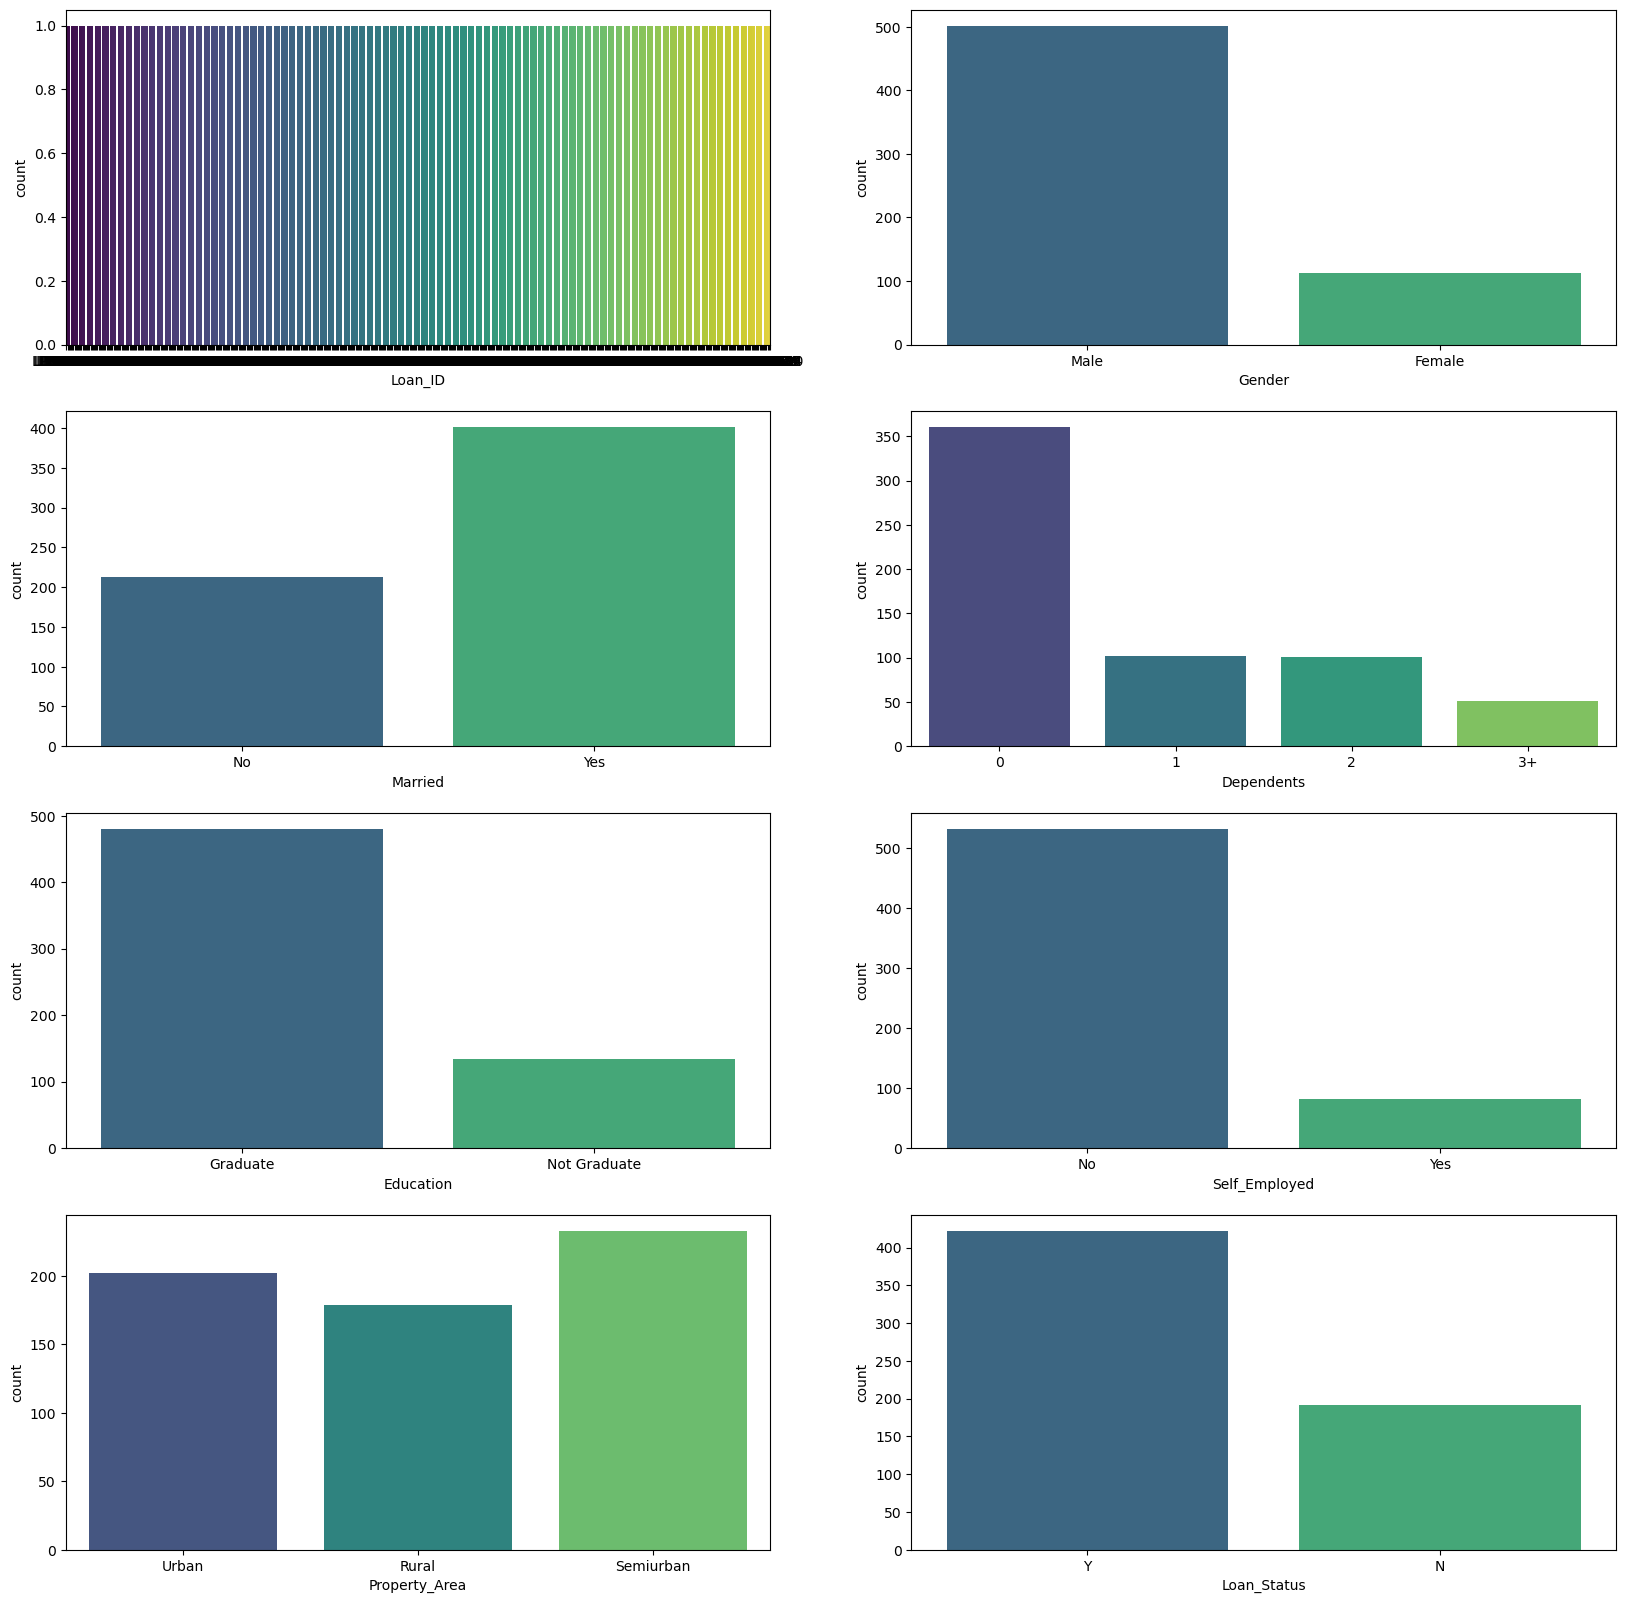

In [23]:
#Visualizing all categorical columns
# categorical_col = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
fig = plt.figure(figsize=[20,20])
for i ,col in enumerate(categorical_col):  
    ax1 = fig.add_subplot(4,2, i+1);
    ax1 = sns.countplot(data = df, x=col, palette='viridis')

In [24]:
#As Loan Id is not necessary I'll drop it.
df.drop(['Loan_ID'],axis=1, inplace=True)

In [25]:
#Checking for how many married or unmaried persons are eligible/not eligible for loan
print(pd.crosstab(data['Loan_Status'], data['Married']))

Married       No  Yes
Loan_Status          
N             79  113
Y            134  285


In [26]:
df.groupby(df['Loan_Status'])['Married'].nunique()

Loan_Status
N    2
Y    2
Name: Married, dtype: int64

In [27]:
#Checking for how many Graduate or non-graduate persons are eligible for loan
print(pd.crosstab(data['Loan_Status'], data['Education']))

Education    Graduate  Not Graduate
Loan_Status                        
N                 140            52
Y                 340            82


In [28]:
#Loan eligibility in diffrent diffrent areas
print(pd.crosstab(data['Loan_Status'], data['Property_Area']))

Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 69         54     69
Y                110        179    133


In [29]:
print(pd.crosstab(data['Loan_Status'], data['Self_Employed']))

Self_Employed   No  Yes
Loan_Status            
N              157   26
Y              343   56


In [30]:
#After drpping loan id all Categorical columns
categorical_col = [fea for fea in df.columns if df[fea].dtype == 'O']
categorical_col

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

# Transformation categorical data into numerical

In [31]:
#Converting all categorical fetures into numerical by labelencoding
from sklearn.preprocessing import LabelEncoder

lblEn = LabelEncoder()
for col in categorical_col:
    df[col] = lblEn.fit_transform(df[col])

In [32]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674026,0.000000,128.0,360.0,1.0,2,1
1,1,1,1,0,0,8.430109,7.319202,128.0,360.0,1.0,0,0
2,1,1,0,0,1,8.006368,0.000000,66.0,360.0,1.0,2,1
3,1,1,0,1,0,7.856707,7.765993,120.0,360.0,1.0,2,1
4,1,0,0,0,0,8.699515,0.000000,141.0,360.0,1.0,2,1


<AxesSubplot:>

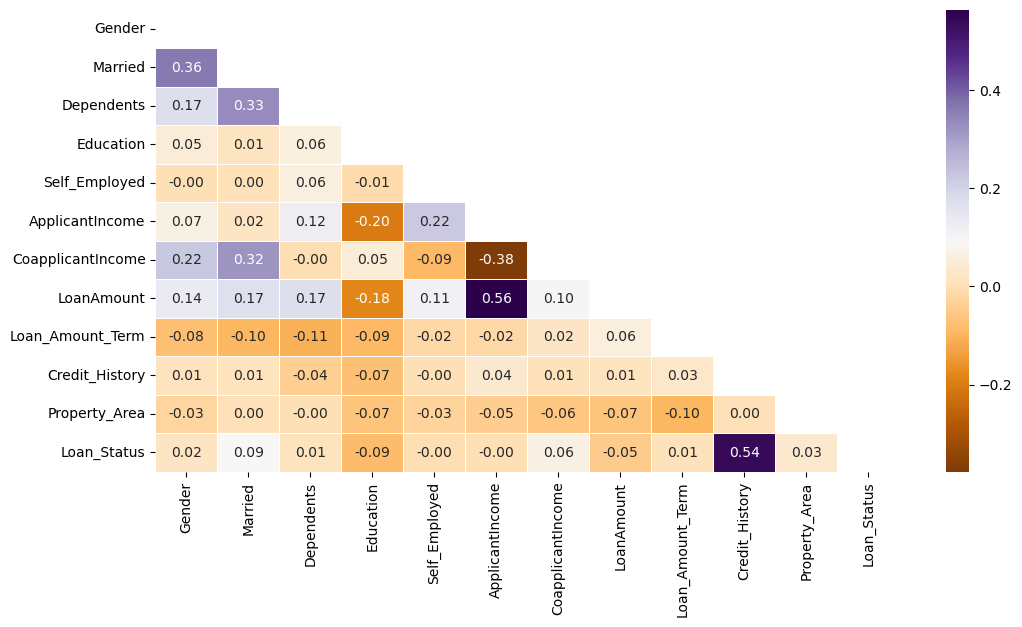

In [33]:
# Correlation Analysis Using Heatmap 

plt.figure(figsize=(12, 6))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(),mask= mask, annot=True, fmt='.2f', linewidths=0.5, cmap='PuOr')

In [34]:
#Separating dependent and independent features
x = df.drop(['Loan_Status'], axis = 1)
y = df['Loan_Status']

In [35]:
x.shape

(614, 11)

In [36]:
x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

# Handling Imbalance data

In [41]:
from imblearn.over_sampling import RandomOverSampler

# Create an instance of RandomOverSampler
rdsample = RandomOverSampler()

# Perform oversampling
x_sampled, y_sampled = rdsample.fit_resample(x, y)

In [42]:
print(x_sampled.shape)
print(y_sampled.shape)

(844, 11)
(844,)


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

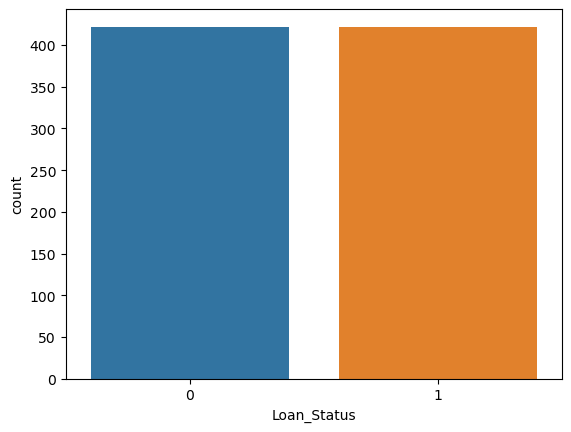

In [43]:
# after handling imbalance data
sns.countplot(data=df, x= y_sampled)     

In [44]:
# Train test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report

# Model Building
# Logistc Regression

In [46]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)


LogisticRegression()

In [47]:
log_pred=log_model.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


accuracy = accuracy_score(log_pred, y_test)
precision = precision_score(log_pred, y_test)
recall = recall_score(log_pred, y_test)
f1 = f1_score(log_pred, y_test)
roc_auc = roc_auc_score(log_pred, y_test)
confusion_mat = confusion_matrix(log_pred, y_test)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')
print(f'Confusion Matrix:\n{confusion_mat}')


Accuracy: 0.7886178861788617
Precision: 0.9875
Recall: 0.7596153846153846
F1 Score: 0.8586956521739131
ROC AUC Score: 0.8534919028340081
Confusion Matrix:
[[18  1]
 [25 79]]


In [53]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



# SVM

In [54]:
classifier_svm=SVC(kernel='rbf',random_state=0)
classifier_svm.fit(X_train,y_train)
svm_pred=classifier_svm.predict(X_test)

In [55]:
# Evaluating the model performance

accuracy = accuracy_score(svm_pred, y_test)
precision = precision_score(svm_pred, y_test)
recall = recall_score(svm_pred, y_test)
f1_score = f1_score(svm_pred, y_test)
# roc_auc_score = roc_auc_score(svm_pred, y_test)
confusion_matrix = confusion_matrix(svm_pred, y_test)

print(f'Accuracy: {accuracy} \nPrecision: {precision} \nRecall: {recall} \nf1_score: {f1_score} \nConfusion matrix:\n {confusion_matrix}')


Accuracy: 0.6504065040650406 
Precision: 1.0 
Recall: 0.6504065040650406 
f1_score: 0.7881773399014779 
Confusion matrix:
 [[ 0  0]
 [43 80]]


In [56]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.65      1.00      0.79        80

    accuracy                           0.65       123
   macro avg       0.33      0.50      0.39       123
weighted avg       0.42      0.65      0.51       123



# Decision Tree

In [57]:
classifier_tree=DecisionTreeClassifier()

# training the Decision Tree model on the sampled train dataset
classifier_tree.fit(X_train,y_train)
dt_pred=classifier_tree.predict(X_test)

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


acc = accuracy_score(dt_pred, y_test)
prec = precision_score(dt_pred, y_test)
rec = recall_score(dt_pred, y_test)
f1 = f1_score(dt_pred, y_test)
roc_auc = roc_auc_score(dt_pred, y_test)
conf_mat = confusion_matrix(dt_pred, y_test)

print(f'Accuracy: {acc}')
print(f'Precision: {prec}')
print(f'Recall: {rec}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')
print(f'Confusion Matrix:\n{conf_mat}')


Accuracy: 0.7317073170731707
Precision: 0.8375
Recall: 0.7701149425287356
F1 Score: 0.8023952095808383
ROC AUC Score: 0.7045019157088122
Confusion Matrix:
[[23 13]
 [20 67]]


In [60]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.64      0.53      0.58        43
           1       0.77      0.84      0.80        80

    accuracy                           0.73       123
   macro avg       0.70      0.69      0.69       123
weighted avg       0.72      0.73      0.73       123



# Random Forest

In [61]:
classifier_forest=RandomForestClassifier(criterion='entropy',random_state=0)

# training the Random Forest model on the sampled train dataset
classifier_forest.fit(X_train,y_train)

# pedicting the labels on the test set
rf_pred=classifier_forest.predict(X_test)

In [62]:
# Evaluating the model performance

accuracy = accuracy_score(rf_pred, y_test)
precision = precision_score(rf_pred, y_test)
recall = recall_score(rf_pred, y_test)
f1_score = f1_score(rf_pred, y_test)
roc_auc_score = roc_auc_score(rf_pred, y_test)
confusion_matrix = confusion_matrix(rf_pred, y_test)

print(f'Accuracy: {accuracy} \nPrecision: {precision} \nRecall: {recall} \nf1_score: {f1_score} \nroc_auc_curve: {roc_auc_score} \nConfusion matrix:{confusion_matrix}')


Accuracy: 0.7804878048780488 
Precision: 0.975 
Recall: 0.7572815533980582 
f1_score: 0.8524590163934427 
roc_auc_curve: 0.8286407766990292 
Confusion matrix:[[18  2]
 [25 78]]


In [63]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



# KNN

In [64]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train,y_train)
knn_pred = knn_classifier.predict(X_test)

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Assuming you have predictions stored in the 'knn_pred' variable and true labels in the 'y_test' variable

acc = accuracy_score(knn_pred, y_test)
prec = precision_score(knn_pred, y_test)
rec = recall_score(knn_pred, y_test)
f1 = f1_score(knn_pred, y_test)
roc_auc = roc_auc_score(knn_pred, y_test)
conf_mat = confusion_matrix(knn_pred, y_test)

print(f'Accuracy: {acc}')
print(f'Precision: {prec}')
print(f'Recall: {rec}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')
print(f'Confusion Matrix:\n{conf_mat}')


Accuracy: 0.6178861788617886
Precision: 0.8625
Recall: 0.6571428571428571
F1 Score: 0.745945945945946
ROC AUC Score: 0.5230158730158729
Confusion Matrix:
[[ 7 11]
 [36 69]]


In [67]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.39      0.16      0.23        43
           1       0.66      0.86      0.75        80

    accuracy                           0.62       123
   macro avg       0.52      0.51      0.49       123
weighted avg       0.56      0.62      0.57       123

